In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
df.head

<bound method NDFrame.head of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.

In [3]:
df.dropna(inplace=True)

In [4]:
df.head

<bound method NDFrame.head of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
5                Baji Sankar      Mind-blowing purchase   
6          Flipkart Customer                  Must buy!   
...                      ...                        ...   
8495     vishal kumar ashish                       Nice   
8496         Nitya Nand  Rai                Good choice   
8497             Tarun Reddy                    Awesome   
8499             Jayachandra                  High cost   
8507            vishnu varma                Really Nice   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.

In [7]:
df['Cleaned Review Text'] = df['Review text'].str.lower().str.replace('[^\w\s]', '')

C:\Users\Nihal\AppData\Local\Temp\ipykernel_40104\1508608032.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned Review Text'] = df['Review text'].str.lower().str.replace('[^\w\s]', '')


In [8]:
print(df.head())

            Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
5             Baji Sankar      Mind-blowing purchase   
6       Flipkart Customer                  Must buy!   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
5   Certified Buyer, Hyderabad     173.0        45.0  Oct 2018   
6  Certified Buyer, Doom Dooma     403.0       121.0  Jan 2020   

                                         Review text  Ratings  \
0  Nice product, good quality, but price is now r...        4   
1  They didn't supplied Yonex Mavis 350. Outside ...        1   
2  Worst product. Damaged shuttlecocks packed in ...        1   
5  Goo

In [9]:
df.to_csv('pdata.csv', index=False)

In [12]:
from textblob import TextBlob

# Function to classify sentiment as positive, negative, or neutral based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to perform sentiment analysis on reviews
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return classify_sentiment(analysis.sentiment.polarity)

In [11]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 92.2/626.3 kB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 163.8/626.3 kB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 2.2 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 2.2 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/626.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_csv('pdata.csv')

# Apply sentiment analysis to the preprocessed reviews
df['Sentiment'] = df['Cleaned Review Text'].apply(analyze_sentiment)

In [14]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Cleaned Review Text,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,nice product good quality but price is now ris...,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,they didnt supplied yonex mavis 350 outside co...,Neutral
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,worst product damaged shuttlecocks packed in n...,Negative
3,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,good quality product delivered on timeread more,Positive
4,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,best purchase it is a good quality and is more...,Positive


In [15]:
df.to_csv('sentimentdata.csv',index=False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('pdata.csv')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned Review Text'], df['Ratings'], test_size=0.2, random_state=42)

In [20]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [21]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_counts, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6568933250155957


In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.56      0.59       147
           2       0.30      0.16      0.21        51
           3       0.37      0.14      0.21       119
           4       0.32      0.06      0.10       319
           5       0.69      0.96      0.80       967

    accuracy                           0.66      1603
   macro avg       0.46      0.38      0.38      1603
weighted avg       0.58      0.66      0.58      1603



In [31]:
import pickle

# Save the trained logistic regression model
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df1=pd.read_csv('sentimentdata.csv')

In [25]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 655.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 766.6 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 655.9 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 749.3 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 741.6 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 714.1 kB/s eta 0:00:00
Note:

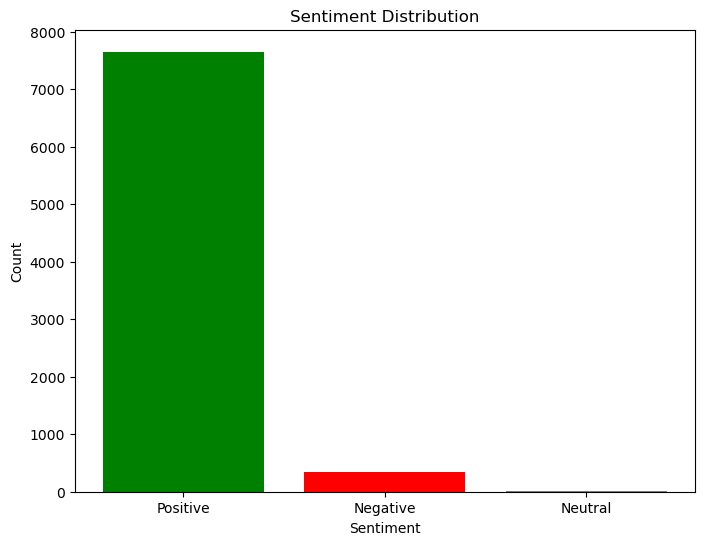

In [30]:
sentiment_counts = df1['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()